In [1]:
!kaggle datasets download jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
 98% 573M/587M [00:07<00:00, 155MB/s]
100% 587M/587M [00:07<00:00, 78.8MB/s]


In [2]:
!unzip /content/weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [3]:
!cd /content/dataset
!mkdir /content/dataset/train /content/dataset/test
!mkdir /content/dataset/train/dew /content/dataset/train/fogsmog /content/dataset/train/frost /content/dataset/train/glaze /content/dataset/train/hail /content/dataset/train/lightning /content/dataset/train/rain /content/dataset/train/rainbow /content/dataset/train/rime /content/dataset/train/sandstorm /content/dataset/train/snow
!mkdir /content/dataset/test/dew /content/dataset/test/fogsmog /content/dataset/test/frost /content/dataset/test/glaze /content/dataset/test/hail /content/dataset/test/lightning /content/dataset/test/rain /content/dataset/test/rainbow /content/dataset/test/rime /content/dataset/test/sandstorm /content/dataset/test/snow

In [4]:
import os


path = "/content/dataset/"
for dirpath, dirnames, filenames in os.walk(path):
    directory_level = dirpath.replace(path, "")
    directory_level = directory_level.count(os.sep)
    indent = " " * 4
    print("{}{}/".format(indent*directory_level, os.path.basename(dirpath)))

    for f in filenames:
        print("{}{}".format(indent*(directory_level+1), f))

Streaming output truncated to the last 5000 lines.
    6144.jpg
    6496.jpg
    6618.jpg
    6604.jpg
    6330.jpg
    6219.jpg
    6247.jpg
    6475.jpg
    6354.jpg
    6365.jpg
    6226.jpg
    6521.jpg
    6508.jpg
    6379.jpg
    6391.jpg
    6316.jpg
    6621.jpg
    6445.jpg
    6317.jpg
    6489.jpg
    6523.jpg
    6347.jpg
    6318.jpg
    6590.jpg
    6334.jpg
    6130.jpg
    6519.jpg
    6284.jpg
    6640.jpg
    6397.jpg
    6415.jpg
    6412.jpg
    6186.jpg
    6450.jpg
    6218.jpg
    6573.jpg
    6137.jpg
    6723.jpg
    6443.jpg
    6467.jpg
    6560.jpg
    6304.jpg
    6111.jpg
    6566.jpg
    6188.jpg
    6476.jpg
    6210.jpg
    6141.jpg
    6541.jpg
    6429.jpg
    6255.jpg
    6577.jpg
    6571.jpg
    6113.jpg
    6539.jpg
    6588.jpg
    6408.jpg
    6139.jpg
    6558.jpg
    6524.jpg
    6275.jpg
    6252.jpg
    6362.jpg
    6091.jpg
    6220.jpg
    6658.jpg
    6507.jpg
    6127.jpg
    6385.jpg
    6657.jpg
    6427.jpg
    6441.jpg
    6336.jpg


In [5]:
import random
import shutil


types = ['fogsmog', 'hail', 'dew', 'sandstorm', 'rime', 'frost', 'rainbow', 'glaze', 'rain', 'snow', 'lightning']

for t in types:
    origin = '/content/dataset/' + t + '/'
    for root, dirs, files in os.walk(origin):
        random.shuffle(files)
        train_list = files[:int((0.8)*len(files))]
        test_list = files[int((0.8)*len(files)):]
        for f in train_list:
            shutil.copy(origin+f, '/content/dataset/train/' + t + '/' +f)
        for f in test_list:
            shutil.copy(origin+f, '/content/dataset/test/' + t + '/' +f)

In [6]:
print("TRAIN DATASET")
print("_____________")
sum = 0
for root, dirs, files in os.walk('/content/dataset/train/'):
    if files != []:
        print(root, "-->", len(files))
        sum += len(files)

print("_____________")
print("TOTAL = ", sum)
print()
print()


print("TEST DATASET")
print("_____________")
sum = 0
for root, dirs, files in os.walk('/content/dataset/test/'):
    if files != []:
        print(root, "-->", len(files))
        sum += len(files)

print("_____________")
print("TOTAL = ", sum)
print()

TRAIN DATASET
_____________
/content/dataset/train/sandstorm --> 553
/content/dataset/train/lightning --> 301
/content/dataset/train/rain --> 420
/content/dataset/train/glaze --> 511
/content/dataset/train/frost --> 380
/content/dataset/train/rime --> 928
/content/dataset/train/snow --> 496
/content/dataset/train/rainbow --> 185
/content/dataset/train/dew --> 558
/content/dataset/train/fogsmog --> 680
/content/dataset/train/hail --> 472
_____________
TOTAL =  5484


TEST DATASET
_____________
/content/dataset/test/sandstorm --> 139
/content/dataset/test/lightning --> 76
/content/dataset/test/rain --> 106
/content/dataset/test/glaze --> 128
/content/dataset/test/frost --> 95
/content/dataset/test/rime --> 232
/content/dataset/test/snow --> 125
/content/dataset/test/rainbow --> 47
/content/dataset/test/dew --> 140
/content/dataset/test/fogsmog --> 171
/content/dataset/test/hail --> 119
_____________
TOTAL =  1378



In [7]:
import tensorflow as tf

train_dir = '/content/dataset/train/'
test_dir = '/content/dataset/test/'

batch_size = 32
image_size = (256, 256)


train_data_loader = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode='categorical',  # Using categorical labels for multi-class classification
    validation_split=0.1,  # 10% split of the training data for validation
    subset='training',  # Specifying 'training' to get the training split
)

validation_data_loader = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode='categorical',
    validation_split=0.1,
    subset='validation'  # Specifying 'validation' to get the validation split
)

test_data_loader = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode='categorical'
)

Found 5484 files belonging to 11 classes.
Using 4936 files for training.
Found 5484 files belonging to 11 classes.
Using 548 files for validation.
Found 1378 files belonging to 11 classes.


In [8]:
class_names = train_data_loader.class_names
print(class_names)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [9]:
for image_batch, labels_batch in train_data_loader:
    print("Image Batch Shape ", image_batch.shape)
    print("Labels Batch Shape ",labels_batch.shape)
    print()
    print("Labels Array of a particular image sample:")
    print(labels_batch[0])
    break

Image Batch Shape  (32, 256, 256, 3)
Labels Batch Shape  (32, 11)

Labels Array of a particular image sample:
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(11,), dtype=float32)


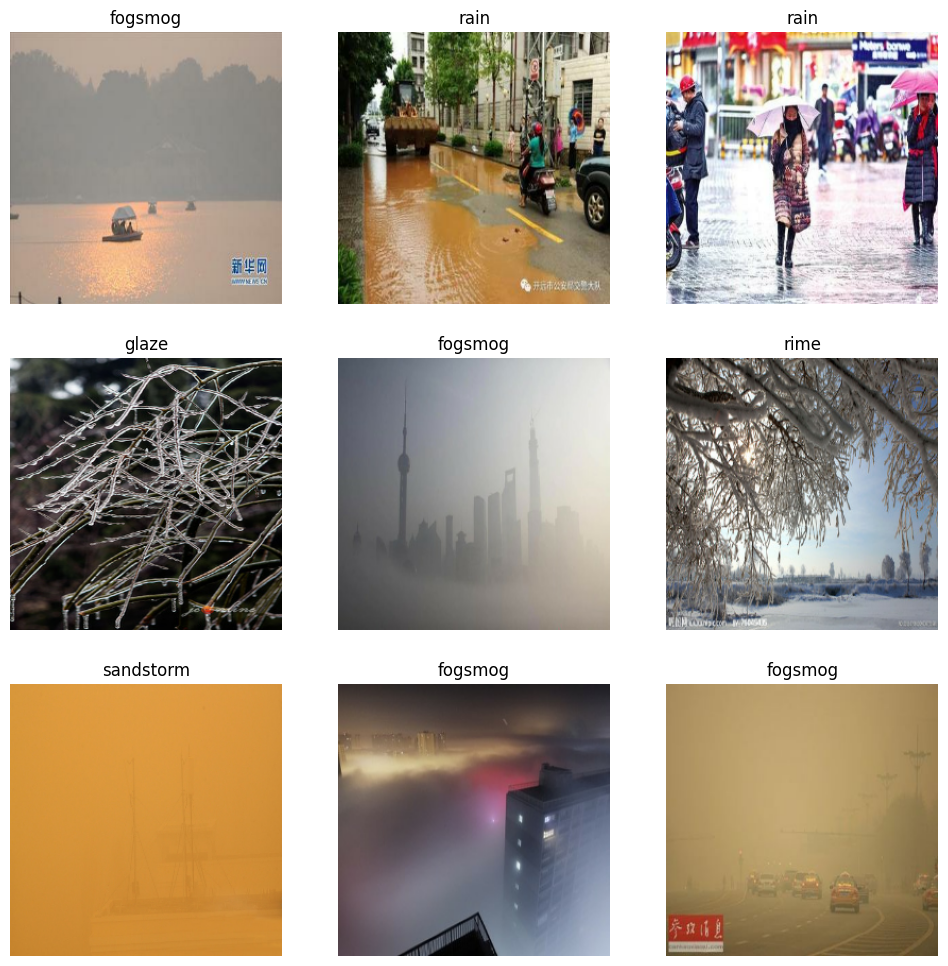

In [10]:
import matplotlib.pyplot as plt

train_ds = train_data_loader.take(1)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))


for images, labels in train_ds:
    for i in range(9):
        row = i // 3  # Calculate the row index
        col = i % 3
        ax = axs[row, col]
        ax.imshow(images[i].numpy().astype("uint8"))


        # Convert the float tensor to an integer tensor
        int_tensor = tf.cast(labels[i], dtype=tf.int32)

        # Convert the integer tensor to a NumPy array
        int_array = int_tensor.numpy()

        for idx in range(0, len(int_array)):
            if int_array[idx] == 1:
                break
        ax.set_title(class_names[idx])
        ax.axis('off')

In [11]:
total_images = 0
for image_batch, _ in train_data_loader:
    total_images += len(image_batch)
print("Total number of images:", total_images)

Total number of images: 4936


In [12]:
def horizontal_flip(image, label):
    image = tf.image.flip_left_right(image)  # Flip horizontally
    return image, label

def vertical_flip(image, label):
    image = tf.image.flip_up_down(image)      # Flip vertically
    return image, label


augment_train1 = train_data_loader.map(horizontal_flip)
augment_train2 = train_data_loader.map(vertical_flip)


train_data_loader = train_data_loader.concatenate(augment_train1)
train_data_loader = train_data_loader.concatenate(augment_train2)

In [13]:
total_images = 0
for image_batch, _ in train_data_loader:
    total_images += len(image_batch)
print("Total number of images:", total_images)

Total number of images: 14808


In [14]:
import tensorflow as tf
normalization_layer = tf.keras.layers.Rescaling(1./255)


# Applying the rescale transformation using the map method
train_data_loader = train_data_loader.map(lambda x, y: (normalization_layer(x), y))
validation_data_loader = validation_data_loader.map(lambda x, y: (normalization_layer(x), y))
test_data_loader = test_data_loader.map(lambda x, y: (normalization_layer(x), y))

#Xception Model

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
base_model = Xception(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)  # Output layer

# Create the full model
Xception_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
LR = 0.0001
Xception_model.compile(optimizer=Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
Xception_model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement after which training will stop
    verbose=1,            # Display messages about the early stopping process
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [18]:
import time


start = time.time()

num_epochs = 50


# Train the model
history = Xception_model.fit(
    train_data_loader,
    validation_data=validation_data_loader,
    epochs=num_epochs,
    callbacks=[early_stopping]
)

Epoch 1/50
465/465 [==============================] - 319s 601ms/step - loss: 1.2781 - accuracy: 0.5548 - val_loss: 0.3895 - val_accuracy: 0.8869
Epoch 2/50
465/465 [==============================] - 281s 603ms/step - loss: 0.3306 - accuracy: 0.9028 - val_loss: 0.2743 - val_accuracy: 0.9325
Epoch 3/50
465/465 [==============================] - 282s 605ms/step - loss: 0.1553 - accuracy: 0.9569 - val_loss: 0.3401 - val_accuracy: 0.9142
Epoch 4/50
465/465 [==============================] - 282s 605ms/step - loss: 0.1056 - accuracy: 0.9716 - val_loss: 0.3038 - val_accuracy: 0.9270
Epoch 5/50
465/465 [==============================] - 283s 607ms/step - loss: 0.0618 - accuracy: 0.9848 - val_loss: 0.3387 - val_accuracy: 0.9252
Epoch 6/50
465/465 [==============================] - 280s 601ms/step - loss: 0.0541 - accuracy: 0.9867 - val_loss: 0.3392 - val_accuracy: 0.9288
Epoch 7/50
465/465 [==============================] - 282s 605ms/step - loss: 0.0520 - accuracy: 0.9867 - val_loss: 0.3708 -

In [19]:
end = time.time()

print("Total time: ",  (end-start)//60, " mins ", (end-start)%60, "secs")

Total time:  40.0  mins  26.12548565864563 secs


In [20]:
test_loss, test_accuracy = Xception_model.evaluate(test_data_loader, verbose=2)

print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

44/44 - 8s - loss: 0.3310 - accuracy: 0.9071 - 8s/epoch - 189ms/step
Test Accuracy:  0.9071117639541626
Test Loss:  0.33099672198295593


In [21]:
Xception_history = history

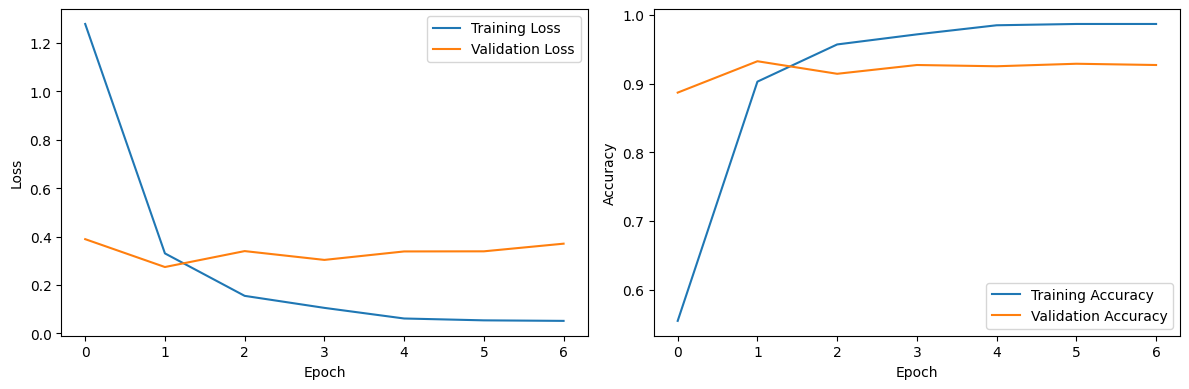

In [22]:
import matplotlib.pyplot as plt

training_loss = Xception_history.history['loss']
training_accuracy = Xception_history.history['accuracy']

validation_loss = Xception_history.history['val_loss']
validation_accuracy = Xception_history.history['val_accuracy']


plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Ensure proper spacing of subplots
plt.show()


In [23]:
Xception_model.save("Weather_Xception.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
!pip install --upgrade gradio

In [32]:
from tensorflow.keras.models import load_model
model = load_model('/content/Weather_Xception.h5')

In [33]:
class_names

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

In [36]:
import gradio as gr

def predict_image(img):

    img = img.resize((150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]


    predicted_label = class_names[predicted_class]

    return predicted_label


interface = gr.Interface(fn=predict_image,
                         inputs=gr.Image(type="pil"),
                         outputs="text",
                         title="Weather Image Recognition",
                         description="Please Enter an Image of a Weather")

interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5a88c4f4f7922a64b2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
